# Assignment 4

Due Thu, Apr 12, 9:30am, commited to your `phys248` repo on the Abacus GitLab server. 

As part of this assignment you need to add some files you produce. Add these directly to your `Exam_Assignment_Quiz` along with your copy of this Assignment notebook. Do not change the name of the notebook, and make sure you only have one Assignment 4 notebook file in your repo. Do add the required files with the name exactly as specified.

## Problem 1
Solve the network from Lab 11.1 along a trajectory, i.e the time evolution of T which you will use as input. Use the same value for $\rho$ as in part 1. Follow these steps:

1. Read the time and temperature data from the file `T-evol.dat` but reverse the time direction. That means, read time and temperature arrays but then **reverse the direction of the temperature array using array slicing**. Make a plot of $T_9$ vs. $\log t$. $T_9$ (`T9`) is temperature in units of $10^9\mathrm{K}$.
2. Create a linear interpolation function called `get_T9` that returns the temperature as `T9` from an input of time in seconds. Test the function by overplotting a few points to the plot of part 2.1. Test the function `get_rates` by making a plot of the four rates as a function of `T9` in the range of temperatures covered in the trajectory file, and as a function of time covered in the trajectory. 
3. Modify function `react_terms` from Lab 11.1 (and call it `react_terms_t`) in two ways. It should use the `get_rates` subroutine from Lab 11.2 Activity 2 and it should take a molar abundance vector `Y` as well as the time in seconds as input. Then it needs to use `get_T9` to  get the temperature for the given time, and then the rates for the temperature obtained using the `get_rates` function. Use the code from Lab 11.1 Activity 1 to read the initial abundances. Test your function `react_terms_t`.
4. Create a modified version of `f_rhs` called `f_rhs_yt` that uses `react_terms_t` and solve the system of network ODEs for the range of $t \in [0.1,10^{4.6}]$. Plot the evolution of all species mass fractions over `log10` of the time, and make sure that the  time resolution for plotting the results is about 0.02 dex. Use appropriate spacing of glyphs. 
5. Investigate your solution. One species has a maximum during the evolution. Which one and at which time? One species has a minimum? Which one and at which time?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

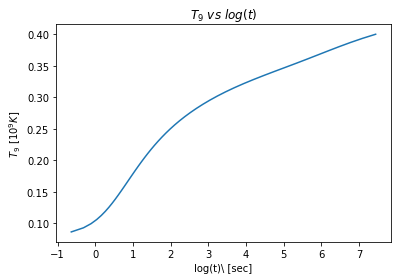

In [3]:
#1
#traj_data = pd.read_csv('../Data/T-evol.dat', sep=' ', header=None, names=['Time', 'T9'], skiprows=11)
#use loadtxt instead of pandas bc easier to use
t, T9 = np.loadtxt('../Data/T-evol.dat', comments='#', unpack=True)
t = t[::-1]
#t[-1]=0 so exclude that point from plotting (if plot and ignore warning-doesn't plot the corect values)
#or could add last element as a really big (-) number and change xlim
log_t = np.append(np.log10(t[:-1]),t[-1])
plt.plot(np.log10(t[:-1]), T9[:-1])
plt.title('$T_9\ vs\ log(t)$')
plt.xlabel('log(t)\ [sec]')
plt.ylabel('$T_9\ [10^9 K]$')
plt.show()

2. Create a linear interpolation function called get_T9 that returns the temperature as T9 from an input of time in seconds. Test the function by overplotting a few points to the plot of part 2.1. Test the function get_rates by making a plot of the four rates as a function of T9 in the range of temperatures covered in the trajectory file, and as a function of time covered in the trajectory.


In [1]:
#2
#why a function?? seems unnecessary??
def get_T9(t, T9):
    '''return linear interpolation for T9 as function of t'''
    temp_int=interpolate.interp1d(t,T9,kind='linear')
    return temp_int(t)

#test w points from 1.1???
log_t = np.append(np.log10(t[:-1]),t[-1])
plt.plot(np.log10(t[:-1]), T9[:-1], label='data')
plt.plot(np.log10(t[:-1]), get_T9(t,T9)[:-1], '.', markevery=5, label='linear interpolation')
plt.title('$T_9$ Data and Linear Interpolation')
plt.xlabel('log(t)\ [sec]')
plt.ylabel('$T_9\ [10^9 K]$')
plt.legend()
plt.show()

def get_rates(t9,fints=[]):
    '''return interpolated rates for all files (aka reverse the log10)'''
    return [10**fint(t9) for fint in fints]


#get files with rates from lab11.2:
files = ['c12pg.txt','c13pg.txt','n14pg.txt','n15pa.txt']
nucdata={}
for file in files:
    nucdata[file] = pd.read_csv('../Data/'+file, sep=' ', header=None, names=['T9','rate'], skiprows=3)

#get interpolation of rates w/ respect to T9 and also t
#since we're plotting over T9 and t (which are bigger than rates files), gotta interpolate
#note rate is log10(rate)
#nope this doesn't work because can't interpolate w/ respect to t?
fints_t = []
fints_T9 = []
for file in files:
    t9 = nucdata[file]['T9']
    rate = np.log10(nucdata[file]['rate'])
    #get cubic interpolations for T9 and t
    inter = interpolate.interp1d(t9, rate, kind='cubic') 
    fints_T9.append(inter)
    inter = interpolate.interp1d(t, rate, kind='cubic')
    fints_t.append(inter)


#now plot get_rates (NOT FINT) of each file vs T9 and also t
#make some cute lil subplots
f, (ax1, ax2) = plt.subplots(1, 2)
#get list of interpolated rates (so not in log10 anymore) (whyy are they log10 in the first place im so confused)
rates_t = get_rates(t, fints_t) 
rates_T9 = get_rates(T9, fints_T9) 
#now plot
for i in len(fints_t):    
    ax1.plot(t, fint_t(t), marker=i+4, markevery=5, label=files[i])
    ax2.plot(T_9, fint_T9(T9), marker=i+4, markevery=5, label=files[i])
ax1.legend()
ax2.legend()
ax1.ylabel('rate')
ax1.xlabel('time [s]')
ax2.xlabel('Rate')
ax2.ylabel('temperature, $T_9\ [10^9 K]$')
f.show()



NameError: name 'np' is not defined

## Problem 2

Search for the global minimum of a function. Consider the function $f(x) = x^2 - \cos(4 \pi x)$

1. Make a plot of the function for $x\in[-2.5,2.5]$. The global minimum is clearly at $x=0$.
2. Confirm this fact by searching for the global mimum using simulated annealing. Start with $x_\mathrm{ini} = 2$ with moves (neighbour function) that replace $x \rightarrow x+\delta$ where $\delta$ is a random number drawn from a Gaussian distiribution with mean zero and standard deviation one. Use an exponential cooling schedule of the form $T =  a \exp(-bt)$ with $t \in [0,t_\mathrm{end}]$. 
3. Using some guesses for $a$, $b$ and $t_\mathrm{end}$ make a plot of all $x$ values as a function of step number with markers only. Add the $x$ values that have been used for an update (those $x'$ for which $P(x',x,T) >= random()$).
4. Use this plot to systematically adjust the parameters $a$, $b$ and $t_\mathrm{end}$ until you find values that give good answers in the smallest number of steps (the number of steps are the number of intervals of $t$. 
5. Make a plot called `global-minimum.png` and commit that along with your solution notebook to your course repo before the deadline. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

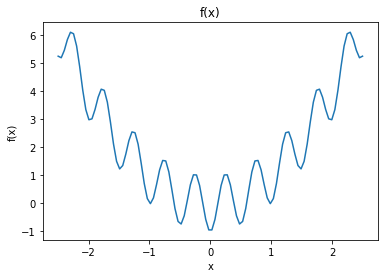

     2.519      2.519    0.987    0.263  140.599
    -0.738
expected: f(0)= -1.0


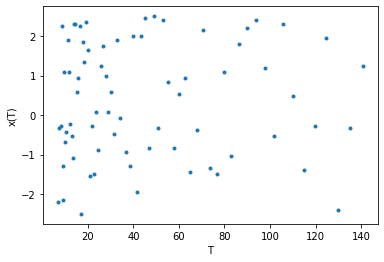

number of steps for T: 75
number of steps for T updated, t_plot: 71


In [43]:
#1
f = lambda x: x**2 - np.cos(4*np.pi*x)
x = np.linspace(-2.5,2.5,100)
plt.plot(x, f(x))
plt.title("f(x)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#2
#functions for simulated annealing:
## state = x -> gets closer until at end, s=x=0 (in general this would be the min of system)
## energy func = f(s)
energy = f #just a pointer for simplicity (if needed)
##neighbour func - find values of x that appropriately neighbour current x
def neighbour(s):
    sp = np.copy(s)
    #choose new index from x (idk how to adjust as we get closer? APF takes care of it?)
    new_s_ind = np.random.randint(len(x)) 
    sp = x[new_s_ind]
    return sp, new_s_ind
##APF = same as lecture 11.2 (works since energy is different)
def P(sp,s,T):
    ep,e = f(sp),f(s)
#    if abs(ep) <= abs(e):
    if ep <= e:
        P = 1
    else:
        P = np.exp(-(ep-e)/T)
    return P
##T - specified in Q description - use Tgrid2
grid = np.linspace(0,3,75)
Tgrid2 = lambda a,b: a*np.exp(-b*grid)
Tgrid = Tgrid2(7,-1) #want big enough step size to not get stuck in local min, start w same as 11.2&lower alpha

#adding in part 3 and 4 here too, adjusting T(a,b) 
x_plot = []
t_plot = []
#now do the descent (could do gradient descent here instead?), adapted from lecture 11.2:
x0 = 2 #initial x
#init state:
s = x0
si = np.copy(s)
ef = f(s)
sf = np.copy(si)
for T in Tgrid:
    sp, new_s_ind = neighbour(s)
    PP = P(sp, s, T)
    RR = np.random.random()
#    print("{:10.3f} {:10.3f} {:8.3f} {:8.3f} {:8.3f}".format(f(s),f(sp),PP,RR,T))
    if PP >= RR:
        s = np.copy(sp)
        x_plot.append(s)
        t_plot.append(T)
# #        if abs(f(s)) < abs(f(sf)):
        if f(s) < f(sf):
            sf = np.copy(s)
#             x_plot.append(sf)
#             t_plot.append(T)

print("{:10.3f} {:10.3f} {:8.3f} {:8.3f} {:8.3f}".format(f(s),f(sp),PP,RR,T))
print("{:10.3f}".format(f(sf)))
print("expected: f(0)=", f(0))

##notes on debugging:
## adding abs() when comparing energies produces a closer approx, since our energy function can produce a negative value
## also the resulting answer (-.012) is determined relatively early in the loop
#!!! problem is that state doesn't approach the minimum - maybe try with array of x instead of the current x value? or state = [array, xval] ?

#plot from part 3
plt.plot(t_plot,x_plot, '.') #looks like T, APF are working okay
plt.xlabel('T')
plt.ylabel('x(T)')
plt.show()

print('number of steps for T:', len(grid))
print('number of steps for T updated, t_plot:', len(t_plot))


## Problem 3

### 3.1
Visualize the Recaman sequence up to $n=66$ by plotting a half-circle between $a_n$ and $a_{n-1}$ below the number ray for $n$ uneven and above for $n$ even. Plot each half circle a different color increasing with $n$ along a continuous color map of your choosing. 
 
Submit image to github to your `Exam_Assignment_Quiz` folder in your with name `racaman-66.png`. Use the Save-figure-button of the interactive plot (not `savefig`). This will download the figure and then you upload it again via the upload button as demonstrated in class 11.2.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.io import wavfile 
from IPython.display import Audio

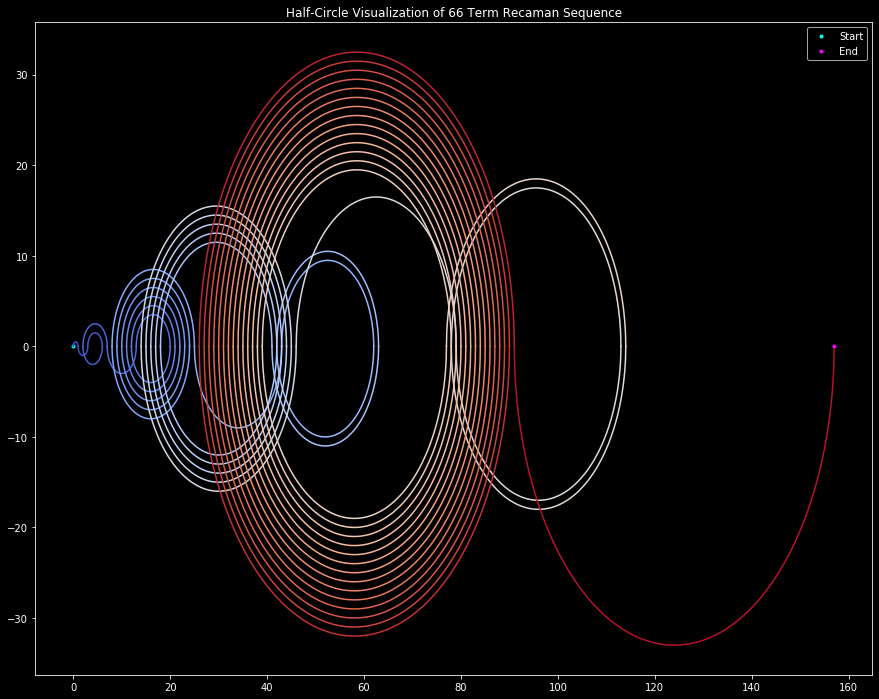

In [67]:
def recaman(n):
    '''add the first n terms of recaman sequence to list a; return a.'''
    a = [0]
    for i in range(1,n+1):
        if (a[i-1] - i) >0 and (a[i-1]-i not in a):
            a.append(a[i-1]-i)
        else:
            a.append(a[i-1] + i)
    return a


N=66
a_66 = recaman(N)
cmap = cm.coolwarm

def half_circ(n):
    '''get half circles for each value in a_66:'''
    half_circ = {}
    an = a_66[n]
    an1 = a_66[n+1]
    c = (an+an1)/2
    r = abs(an-an1)/2
    x = np.linspace(-r,r,1000)
    y = np.sqrt(r**2 - x**2)
    half_circ['y'] = y
    half_circ['x'] = x + c
    half_circ['colour'] = cmap(n/N)
    half_circ['even'] = (-1)**n
    return half_circ

#plot circles:
plt.figure(1, figsize=(15,12))
plt.style.use('dark_background')
plt.plot(a_66[0],0, '.',color='cyan',  label='Start')
for i in range(N):
    h_circ = half_circ(i)
    plt.plot(h_circ['x'], h_circ['y']*h_circ['even'], color=h_circ['colour'])
plt.plot(a_66[-1], 0, '.', color='magenta', label='End')
plt.legend()
plt.title('Half-Circle Visualization of 66 Term Recaman Sequence')
#since i'm not using ipympl, could save and upload the image from output as in description through right clicking+saving
# but easier to use savefig and then comment it out (so not saved by markers too)
#plt.savefig('racaman-66.png') #facecolor defaults to 'auto' - same as figure colour
plt.show()
plt.close(1)



### 3.2

In Lab 10.2 Activity 1 you have calculated the Recaman sequence up to $n=198$. Create a wav file called `recaman-100.wav` that represents the audification of this sequence up to $n=100$.  Use the function $f(n) = f_0  2^{n/36}$ with $f_0 = 466.16/6$ to map the integer numbers of the sequence to frequencies. Use a sampling rate of $8192$ and make each tone $0.2\mathrm{s}$ long. To test your audio file play a version with a bit longer tone length (e.g. $0.4\mathrm{s}$) and follow along the figure you created in Lab 10.2 Activitiy 1 (the _music score_) to see if you recognize the Recaman melodie.

Note: Make a plot of the frequency mapping function $f_0$ for the range of integer values that the Recaman series assumes up to $n=100$ to convince yourself that the sampling rate is just barely sufficient to cover the highest-pitch tones.  

Check the size of your `recaman-100.wav`. It should be well below 1MB. Add the file to your `Exam_Assignment_Quiz` folder.

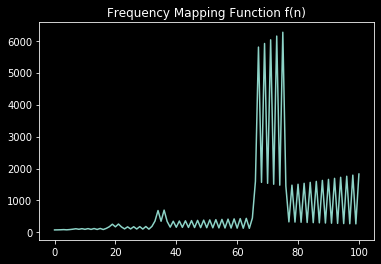

In [84]:
#recaman sequence for n=100
N2 = 100
a_100 = np.array(recaman(N2))

f0 = 466.16/6
f = lambda n: f0*2**(n/36)
sr = 8192
ns = .2 #s

a_freq = f(a_100)
#test freq map function
plt.plot(a_freq)
plt.title('Frequency Mapping Function f(n)')
plt.show() #from plot, s_rate > max freq

dd = []
for freq in a_freq:
    x= np.linspace(0,ns*2*np.pi*freq,int(ns*sr))
    dd.append(np.array(np.sin(x),dtype='float32'))
dd = np.array(dd)
dd = dd.flatten()
wavfile.write('recaman-100.wav',sr,dd)
Audio('recaman-100.wav')

In [85]:
!ls -lah r*
#as seen in output, recaman-100.wav is only 647KB

-rw-r--r--. 1 user user 254K Apr 12 15:41 racaman-66.png
-rw-r--r--. 1 user user 3.4K Mar 11 20:01 reason.txt
-rw-r--r--. 1 user user 647K Apr 12 15:59 recaman-100.wav


## Problem 4

### 4.1
Using your work from Lab 10.2 Activity 2 establish a relationship between the boundary width expressed in the standard deviation of the Gauss fit of the radial derivative of the concentration (see class 10.2) and the grid resolution.
1. Create a list of cases with heating factor (`X_Lfactors`) equal to 1000. They all have the time `1360` hours, and there are four of them. Don't create this list by hand, but write code that finds these and arranges the case labels in a list.
2. Write a loop in which each resolution case is fitted with a Gaussian. Record the sigmas and the grid values in two lists called `sigmas` and `grids`.
3. Make log-log plot of the `sigmas` vs `grids`. Interpret the graph in terms of the convergence properties of this metric under grid resolution. What is the _true_ or accurate boundary width?

### 4.2
Recall that data sets are given for each `case` and that for some cases there is a profile for more than one time. The following case and time combinations constitute a sequence of profiles for different luminosities or convection driving strength and similar mass-entrainment rates (i.e. the location of the peak in `grad(FV)` should approximately be at the same radius). The different luminosities are expressed in terms of factors to the nominal heating which represents the heating in a global model that represents best the luminosity in the actual star.

```Python
L_cases=[('M114',4200),('M119',1200),('M118',350)]
for i,(case,time) in enumerate(L_cases):
    print(f"data keys case: {case} and time: {time}")
```

1. Make a plot of the gradient of `FV` as a function of `R` for all three cases and convince yourself that the peak is approximately at the same location. 
2. Again, determine the $\sigma$ for each of the three cases of the luminosity sequence.
3. Fit the log-log data with a linear relation. What is the proportionality constant (which is of course the exponent of the power law describing the relation). Using $\sigma(grid=2688)$ for the luminosity case $1000$ times the nominal heating, and using the power law exponent from the linear fit, what is the estimate of the boundary width for nominal heating? 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import pickle
with open('../Data/data-Pgas-bndry-analysis.pkl', 'rb') as pickle_in:
    data = pickle.load(pickle_in)

In [90]:
def gauss(x, *p):
    '''gaussian fit'''
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#get indices for part 1
indices = np.where(int(data['X_Lfactors'])==1000)
cases = data[indices]

KeyError: 'X_Lfactors'